Iris Dataset\
Objective: To perform classification analysis on Iris dataset. Perform any two classification  algorithms and compare the accuracy.

#Prerequisites

In [451]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [452]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris/IrisData.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#Analysis

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [454]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [455]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Three different species from the Iris genus.\
We have Sepal and Petal dimensions given along with a ID tag. No values missing.\
Prediction Output needs to be a trained model which can classify between them.

#Visualization

In [456]:
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [457]:
#Adding a new feature to make cleaner plots and it is a functionality that will be used for running models too.
def num_species(value):
  if value == 'Iris-setosa':
    return 1
  elif value == 'Iris-versicolor':
    return 2
  else:
    return 3
df['NumSp'] = df.apply(lambda x: num_species(x['Species']), axis=1)

In [458]:
df['NumSp'].value_counts()

3    50
2    50
1    50
Name: NumSp, dtype: int64

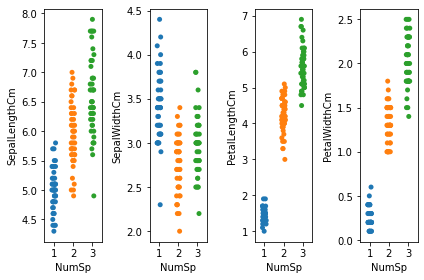

In [459]:
fig, ax = plt.subplots(1,4)
sns.stripplot(x='NumSp', y='SepalLengthCm', data=df, ax=ax[0])
sns.stripplot(x='NumSp', y='SepalWidthCm', data=df, ax=ax[1])
sns.stripplot(x='NumSp', y='PetalLengthCm', data=df, ax=ax[2])
sns.stripplot(x='NumSp', y='PetalWidthCm', data=df, ax=ax[3])
fig.tight_layout()
fig.show()

Distinct features spaced into buckets

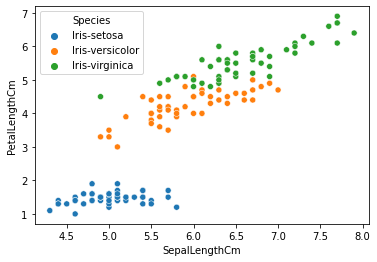

In [460]:
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', hue = 'Species', data = df)

Linear classifier might be a good fit for this case.\
Are the outliers here significant enough to take note of?


In [461]:
#df[50:100] == 'Iris-versicolor'

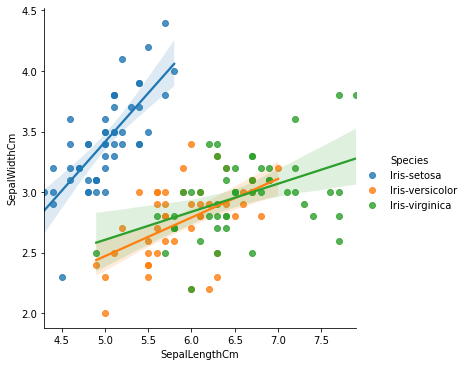

In [562]:
sns.lmplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df);

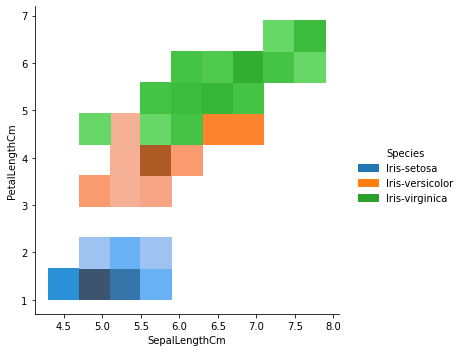

In [462]:
sns.displot(x='SepalLengthCm', y='PetalLengthCm', hue = 'Species', data = df)

In [463]:
from sklearn import linear_model
from sklearn import preprocessing
import numpy as np

In [464]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,NumSp
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [465]:
cols = ['Species', 'NumSp', 'Id']
features = df.drop(cols, axis=1)
x_Data = features
y_Data = df['NumSp']
x_Data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [466]:
y_Data.head()

0    1
1    1
2    1
3    1
4    1
Name: NumSp, dtype: int64

In [467]:
y_Data.value_counts()

3    50
2    50
1    50
Name: NumSp, dtype: int64

In [468]:
x_Train, x_Test, y_Train, y_Test = train_test_split(x_Data, y_Data, test_size=0.2)

In [469]:
x_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 35 to 40
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  120 non-null    float64
 1   SepalWidthCm   120 non-null    float64
 2   PetalLengthCm  120 non-null    float64
 3   PetalWidthCm   120 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


In [470]:
x_Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 145 to 128
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  30 non-null     float64
 1   SepalWidthCm   30 non-null     float64
 2   PetalLengthCm  30 non-null     float64
 3   PetalWidthCm   30 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


In [471]:
y_Train.value_counts()

2    42
3    40
1    38
Name: NumSp, dtype: int64

In [472]:
y_Test.value_counts()

1    12
3    10
2     8
Name: NumSp, dtype: int64

In [473]:
df.NumSp.value_counts()

3    50
2    50
1    50
Name: NumSp, dtype: int64

#Models

In [553]:
from sklearn import model_selection
from sklearn.tree import tree
from sklearn import metrics
from sklearn.linear_model import LinearRegression

##DesicionTreeClassifier

In [554]:
Model1 = tree.DecisionTreeClassifier() #Desicion Tree 
Model1 = Model1.fit(x_Train, y_Train)

In [594]:
Treepredictions = Model1.predict(x_Test)
Score = metrics.accuracy_score(y_Test, Treepredictions) * 100
print(list(Treepredictions))
print(Score)

[3, 3, 2, 1, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3]
100.0


In [593]:
metrics.accuracy_score?

In [ ]:
y_Test(head)

Different Test/Train situations for Desicion Tree

In [619]:
#dIfferent test sizes alters the results
#Change Range
Range = 10
for x in range(1, Range+1):
  x_Train, x_Test, y_Train, y_Test = train_test_split(x_Data, y_Data, test_size=x/(Range*10))
  TestSize = len(x_Train)/len(x_Test)
  Treepredictions = Model1.predict(x_Test)
  print(f'Accuracy: {round(metrics.accuracy_score(y_Test, Treepredictions)* 100, 2)}% with {round(TestSize, 2)}% as training data')

Accuracy: 100.0% with 74.0% as training data
Accuracy: 100.0% with 49.0% as training data
Accuracy: 100.0% with 29.0% as training data
Accuracy: 100.0% with 24.0% as training data
Accuracy: 100.0% with 17.75% as training data
Accuracy: 100.0% with 15.67% as training data
Accuracy: 100.0% with 12.64% as training data
Accuracy: 100.0% with 11.5% as training data
Accuracy: 92.86% with 9.71% as training data
Accuracy: 93.33% with 9.0% as training data


Not very sure why the results are so high but I believe it is so as most of the data are in nead clusters with good quality features which the desicion tree classifies through clearly.

In [623]:
print(Treepredictions[0:5])
print(y_Test[0:5])

[3 3 2 2 3]
102    3
116    3
53     2
82     2
148    3
Name: NumSp, dtype: int64


##Linear Regression

In [608]:
Model2 = LinearRegression()
Model2 = Model2.fit(x_Train, y_Train)
Model2.score(x_Train, y_Train)
Model2.coef_
Model2.intercept_
#prediction

LinRegpredictions = Model2.predict(x_Test) #float results in range 1 to 3
#rounding off
LinRegpredictions

array([2.75366606, 1.19023027, 1.16246197, 2.31914078, 3.05202325,
       2.60541025, 2.67907874, 2.34704616, 2.80738651, 1.07313059,
       2.7514712 , 2.49650571, 2.74714305, 2.29377613, 2.78507457])

Different Test/Train situations for Linear Regreression

In [607]:
Range = 10
for x in range(1, Range+1):
  x_Train, x_Test, y_Train, y_Test = train_test_split(x_Data, y_Data, test_size=x/(Range*10))
  TestSize = len(x_Train)/len(x_Test)
  LinRegpredictions = Model2.predict(x_Test)
  LinRegpredictions = [round(x) for x in LinRegpredictions]
  print(f'Accuracy: {round(metrics.accuracy_score(y_Test, LinRegpredictions)* 100, 2)}% with {round(TestSize, 2)}% as training data')

Accuracy: 100.0% with 74.0% as training data
Accuracy: 100.0% with 49.0% as training data
Accuracy: 100.0% with 29.0% as training data
Accuracy: 100.0% with 24.0% as training data
Accuracy: 100.0% with 17.75% as training data
Accuracy: 88.89% with 15.67% as training data
Accuracy: 100.0% with 12.64% as training data
Accuracy: 100.0% with 11.5% as training data
Accuracy: 100.0% with 9.71% as training data
Accuracy: 93.33% with 9.0% as training data


In [625]:
print(LinRegpredictions[0:5])
print(y_Test[0:5])

[2.75366606 1.19023027 1.16246197 2.31914078 3.05202325]
102    3
116    3
53     2
82     2
148    3
Name: NumSp, dtype: int64
